In [1]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Memuat file CSV
import pandas as pd
raw_data = pd.read_csv('/content/drive/MyDrive/AIEngineerGAIA.csv')

# Menampilkan data
raw_data.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [3]:
raw_data.shape

(22730, 18)

In [4]:
df = raw_data.drop(['id', 'price'], axis=1)

In [5]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7


**Eksplorasi Dan Analisis Data**


In [6]:
import pandas as pd
# Mengecek missing value
raw_data.isnull().sum()


id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [7]:
# Mengecek duplikasi
raw_data.duplicated().sum()

0

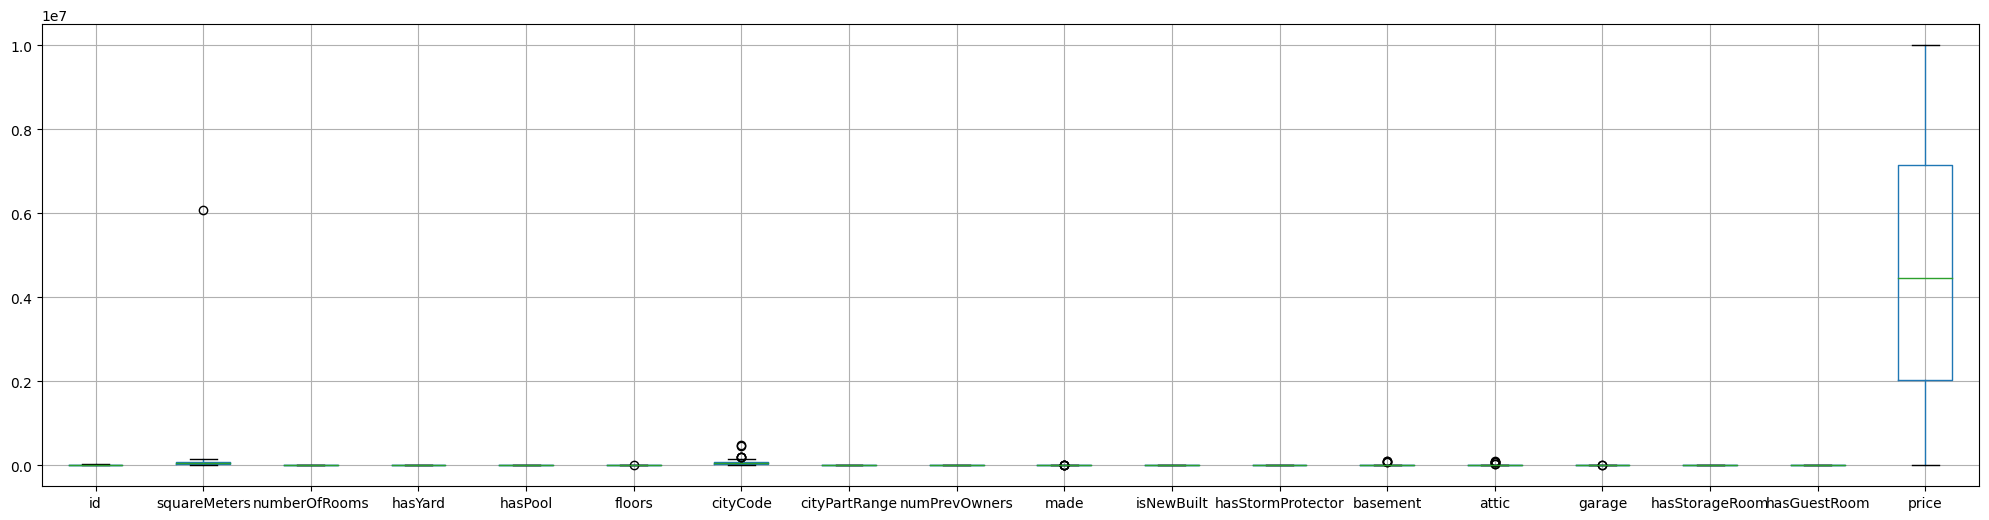

In [8]:
import matplotlib.pyplot as plt

# Mengecek outliers menggunakan boxplot
fig, ax = plt.subplots(figsize=(25,6))
raw_data.boxplot(ax=ax)
plt.show()

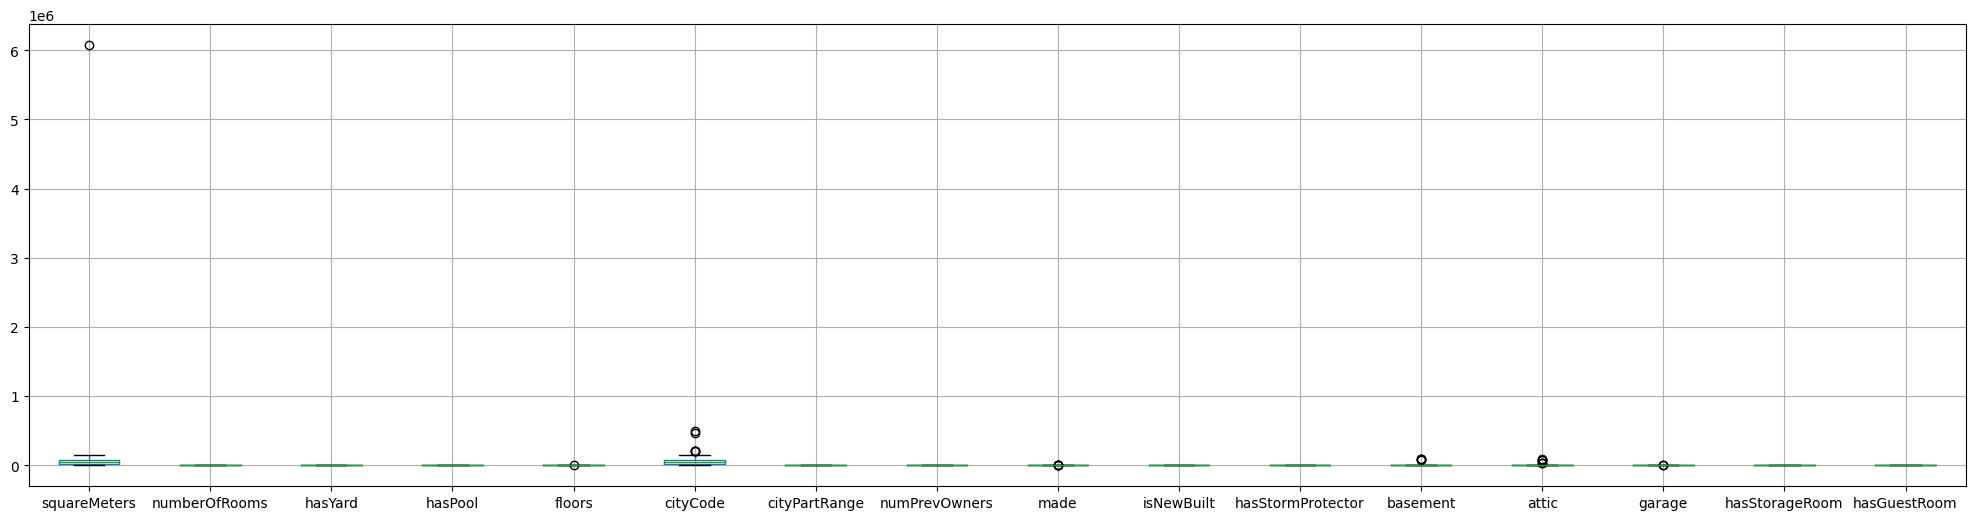

In [9]:
fig, ax = plt.subplots(figsize=(25,6))
df.boxplot(ax=ax)
plt.show()

Data outliers pada kolom squareMeters ada pada baris ke:
Int64Index([15334], dtype='int64')


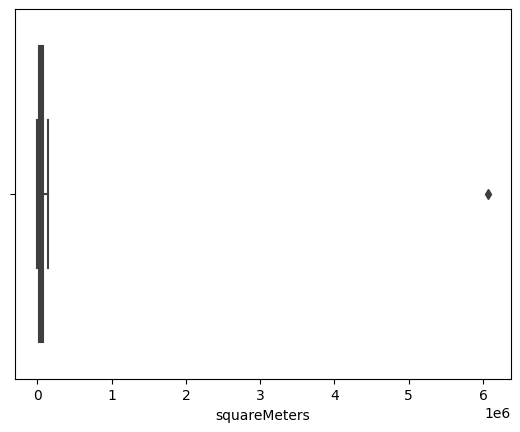

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'squareMeters'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
nilai_kolom = df.loc[15334, 'squareMeters']
print(nilai_kolom)

NameError: ignored

Dari hasil pengamatan data outliers pada kolom square Meters, didapatkan bahwa nilai outlier terlalu jauh dari nilai yang ada. Penulis memutuskan untuk menghapus nilai tersebut karena diasumsikan bahwa data tersebut merupakan kesalahan input yang mana penulis tidak menemukan metode transformasi maupun pendekatan statistik untuk menangani data ini

Data outliers pada kolom floors floors ada pada baris ke:
Int64Index([5659], dtype='int64')


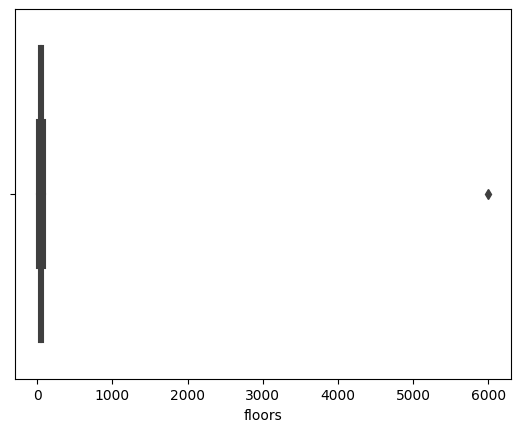

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'floors'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom floors", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
nilai_kolom = df.loc[5659, 'floors']
print(nilai_kolom)

6000


Dari hasil pengamatan data floors, penulis juga menghapus kolom yang berisi data outliers karena penulis mengasumsikan bahwa data ini merupakan kesalahan input. dimana data puluhan terdapat satu data yang ribuan. Untuk kasus ini penulis belum mendapatkan proses transformasi maupun pendekatan statistik untuk menangani data ini

Data outliers pada kolom floors cityCode ada pada baris ke:
Int64Index([299, 1326, 2425, 10987, 20735, 22631], dtype='int64')


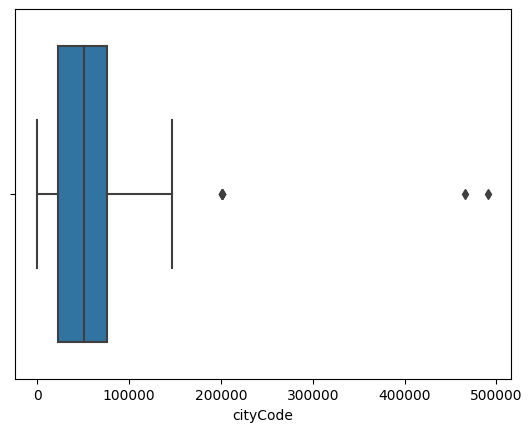

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'cityCode'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom floors", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# memilih kolom yang diinginkan
columns = 'cityCode'

# memilih index yang diinginkan
index_col = [299, 1326, 2425, 10987, 20735, 22631]

# mencetak nilai kolom pada index yang diinginkan
print(df.loc[index_col, columns])

299      201035
1326     491100
2425     465360
10987    200812
20735    200801
22631    200801
Name: cityCode, dtype: int64


Data outliers pada kolom made made ada pada baris ke:
Int64Index([2113, 3608, 19124, 19748, 21400], dtype='int64')


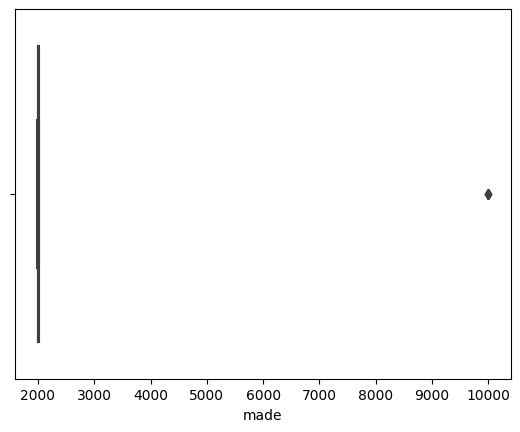

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'made'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom made", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# memilih kolom yang diinginkan
columns = 'made'

# memilih index yang diinginkan
index_col = [2113, 3608, 19124, 19748, 21400]

# mencetak nilai kolom pada index yang diinginkan
print(df.loc[index_col, columns])

2113     10000
3608     10000
19124    10000
19748    10000
21400    10000
Name: made, dtype: int64


Data outliers pada kolom made basement ada pada baris ke:
Int64Index([2107, 3995, 15068, 18926], dtype='int64')


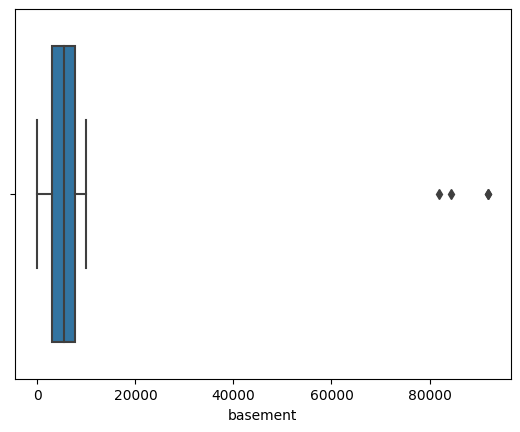

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'basement'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom made", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# memilih kolom yang diinginkan
columns = 'basement'

# memilih index yang diinginkan
index_col = [2107, 3995, 15068, 18926]

# mencetak nilai kolom pada index yang diinginkan
print(df.loc[index_col, columns])

2107     84333
3995     81851
15068    91992
18926    91978
Name: basement, dtype: int64


Data outliers pada kolom made attic ada pada baris ke:
Int64Index([3828, 4909, 12858, 13633, 13642, 17168, 19994], dtype='int64')


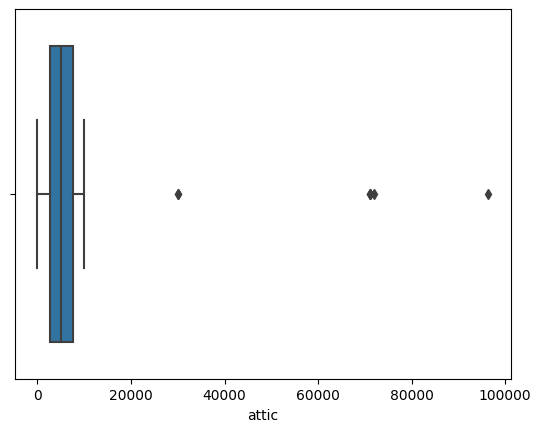

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'attic'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom made", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# memilih kolom yang diinginkan
columns = 'attic'

# memilih index yang diinginkan
index_col = [3828, 4909, 12858, 13633, 13642, 17168, 19994]

# mencetak nilai kolom pada index yang diinginkan
print(df.loc[index_col, columns])

3828     71001
4909     71001
12858    71024
13633    96381
13642    30000
17168    71965
19994    30000
Name: attic, dtype: int64


Data outliers pada kolom made garage ada pada baris ke:
Int64Index([14878, 17629], dtype='int64')


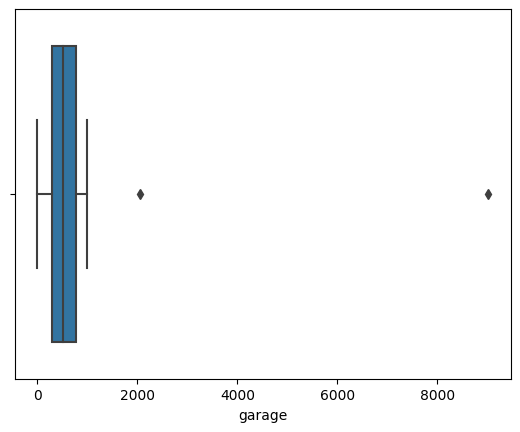

In [ ]:
import seaborn as sns

# Pilih kolom luas bangunan
kolom = 'garage'

# Buat boxplot
sns.boxplot(x=df[kolom])

# Hitung batas bawah dan atas data outliers
q1 = df[kolom].quantile(0.25)
q3 = df[kolom].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

# Cari indeks baris yang mengandung data outliers
outlier_idx = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)].index

# Tampilkan indeks baris yang mengandung data outliers
print("Data outliers pada kolom made", kolom, "ada pada baris ke:")
print(outlier_idx)

# Tampilkan grafik
plt.show()

In [ ]:
from pandas.io.parsers.c_parser_wrapper import is_index_col
# memilih kolom yang diinginkan
columns = 'garage'

# memilih index yang diinginkan
index_col = [14878, 17629]

# mencetak nilai kolom pada index yang diinginkan
print(df.loc[index_col, columns])

14878    2048
17629    9017
Name: garage, dtype: int64


**Data Cleaning**

In [ ]:
df_clean = raw_data.drop(['id'], axis=1)

In [ ]:
# memilih index yang akan dihapus
index_delete = [15334,5659,299, 1326, 2425, 10987, 20735, 22631,2113, 3608,
                19124, 19748, 21400,2107, 3995, 15068, 18926,3828, 4909, 12858,
                13633, 13642, 17168, 19994,14878, 17629]

# menghapus baris pada index yang diinginkan
df_clean = df_clean.drop(index_delete)

In [ ]:
df_clean.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [ ]:
df_clean.shape

(22704, 17)

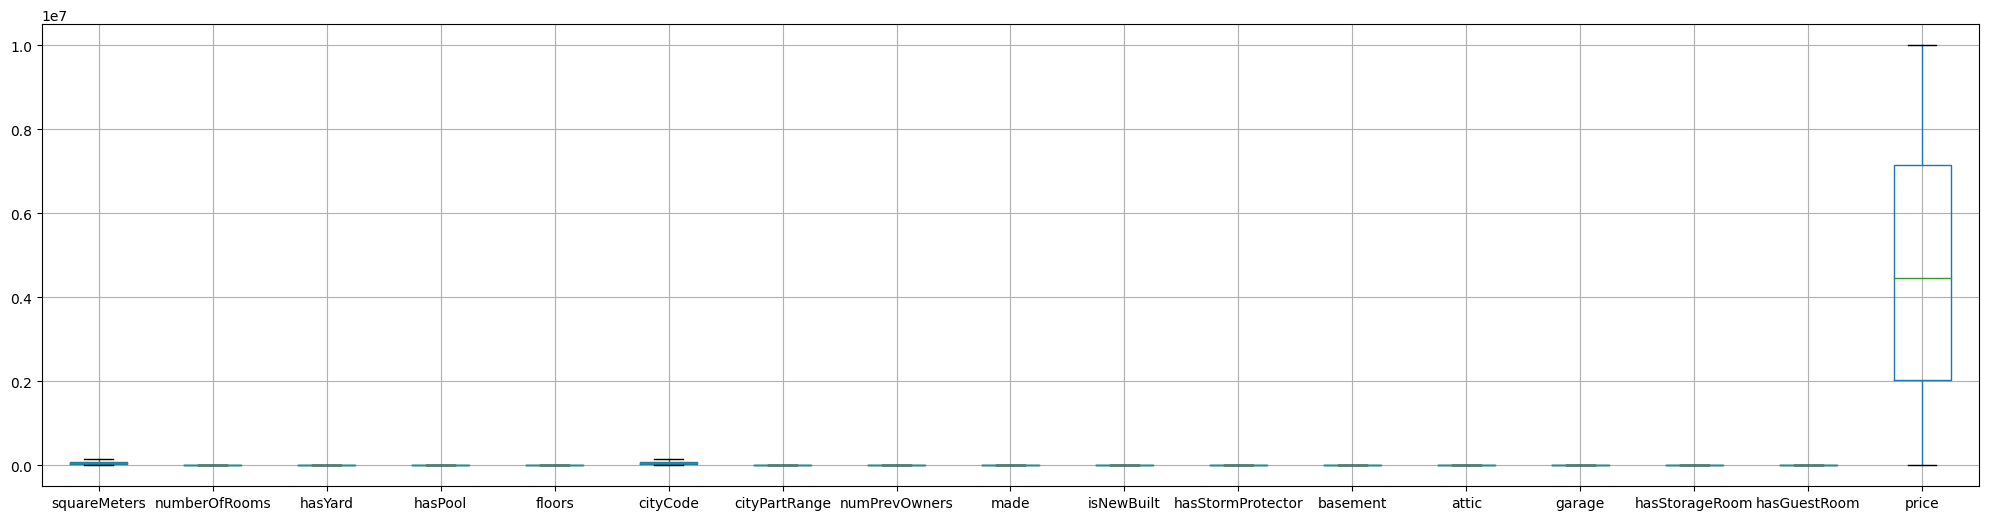

In [ ]:
fig, ax = plt.subplots(figsize=(25,6))
df_clean.boxplot(ax=ax)
plt.show()

**Pembuatan Model Prediksi**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load data
df = df_clean

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# Fit Lasso regression model
alphas = np.logspace(-4, 0, 100)
mse = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

best_alpha = alphas[np.argmin(mse)]
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Evaluate model
y_pred = lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Create table of predicted vs actual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results_df.index.name = 'Observation'
print(results_df.head(10))


RMSE: 95751.11
                Actual     Predicted
Observation                         
15454        7382091.9  7.366020e+06
8188         6243323.3  6.228006e+06
21646        1563887.5  1.576674e+06
7745         7091010.3  7.073206e+06
18855        5183003.6  5.176186e+06
18695        3898194.1  3.887345e+06
13022        4954300.1  4.941842e+06
6966         7351183.7  7.335611e+06
14179        5659030.2  5.663814e+06
21435        2786587.7  2.794054e+06


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler

# # Load data
# df = df_clean

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# # Standardize data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Fit Lasso regression model
# alphas = np.logspace(-4, 0, 100)
# mse = []
# for alpha in alphas:
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train, y_train)
#     mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

# best_alpha = alphas[np.argmin(mse)]
# lasso = Lasso(alpha=best_alpha)
# lasso.fit(X_train, y_train)

# # Evaluate model
# y_pred = lasso.predict(X_test)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# rmse /= 10000
# print(f"RMSE: {rmse:.2f}")

# # Create table of predicted vs actual values
# results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# results_df = results_df.apply(lambda x: x/10000) # convert to thousands
# results_df.index.name = 'Observation'
# print(results_df.head(10))


RMSE: 9.58
                Actual   Predicted
Observation                       
15454        738.20919  736.601744
8188         624.33233  622.800467
21646        156.38875  157.667113
7745         709.10103  707.320631
18855        518.30036  517.618942
18695        389.81941  388.734079
13022        495.43001  494.184143
6966         735.11837  733.561385
14179        565.90302  566.381282
21435        278.65877  279.405455


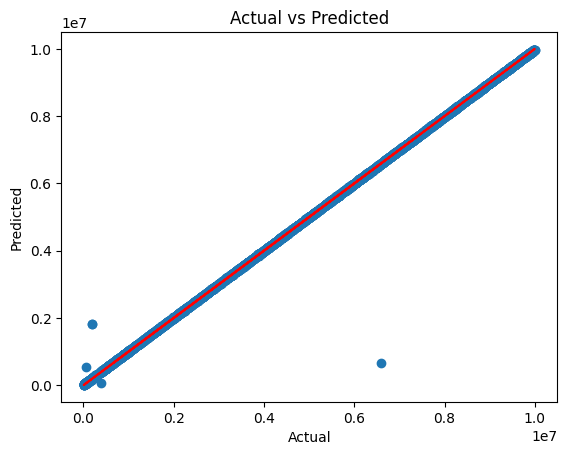

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 1.00


In [ ]:
import joblib

# Save model to file
joblib.dump(lasso, 'lasso_model.pkl')

# Load model from file
loaded_model = joblib.load('lasso_model.pkl')
